# Importar Librerías Necesarias
Importar librerías como pandas, numpy y matplotlib para el análisis y visualización de datos.

In [84]:
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para cálculos numéricos y manejo de arrays
import matplotlib.pyplot as plt  # Para visualización de datos

# Configuración opcional para gráficos más claros
plt.style.use('ggplot')  # Estilo de gráficos
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño predeterminado de las figuras

# Cargar el Conjunto de Datos
Cargar el conjunto de datos desde un archivo CSV o fuente similar utilizando pandas.

In [85]:
# Cargar el conjunto de datos desde un archivo CSV
# Asegúrate de reemplazar 'ruta_al_archivo.csv' con la ruta real de tu archivo
ruta_archivo = 'Datos/despachos.csv'
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga
df.head()

,FECHA_INICIAL,HORA_INICIAL_PLAN,HORA_INICIAL_REAL,HORA_INICIAL_AUX,FECHA_FINAL,HORA_FINAL_PLAN,HORA_FINAL_REAL,HORA_FINAL_AUX,FK_RUTA,PASAJEROS,DISTANCIA,FK_VEHICULO,FK_CONDUCTOR,ESTADO_DESPACHO,PK_INTERVALO_DESPACHO,PK_INFORMACION_REGISTRADORA
0,2024-04-16,4:02:00,NaN,0:00:00,2024-04-16,6:02:00,5:43:49,5:43:49,5,49,35400,51,38,2,244808,347194
1,2024-04-16,4:27:00,NaN,0:00:00,2024-04-16,7:26:00,6:17:02,6:00:50,3,49,33200,28,72,2,244812,347197
2,2024-04-16,4:50:00,4:56:47,4:56:47,2024-04-16,7:01:00,6:12:07,6:12:07,6,28,27200,66,304,2,244814,347198
3,2024-04-16,4:12:00,NaN,0:00:00,2024-04-16,7:11:00,6:16:04,6:16:04,3,41,42800,22,321,2,244810,347199
4,2024-04-16,5:00:00,5:00:12,5:00:12,2024-04-16,7:00:00,6:35:30,6:35:30,5,34,31800,47,307,2,244818,347201


# Explorar el Campo 'PASAJEROS'
Realizar un análisis exploratorio del campo 'PASAJEROS', incluyendo estadísticas descriptivas como media, mediana y percentiles.

Estadísticas descriptivas del campo 'PASAJEROS':
count    55952.000000
mean        46.157993
std         16.310046
min          1.000000
25%         36.000000
50%         45.000000
75%         55.000000
max        868.000000
Name: PASAJEROS, dtype: float64


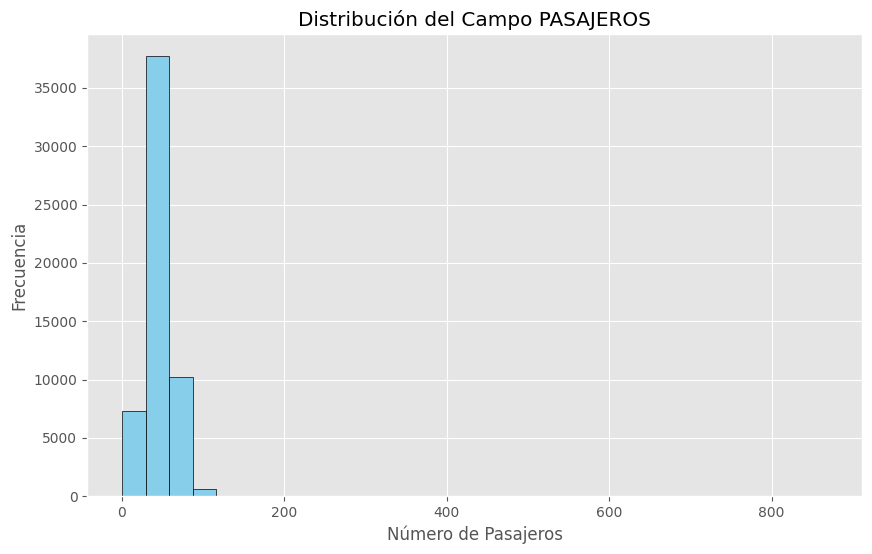

In [86]:
# Calcular estadísticas descriptivas para el campo 'PASAJEROS'
estadisticas_pasajeros = df['PASAJEROS'].describe(percentiles=[0.25, 0.5, 0.75])

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas del campo 'PASAJEROS':")
print(estadisticas_pasajeros)

# Visualizar la distribución del campo 'PASAJEROS' con un histograma
plt.hist(df['PASAJEROS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Campo PASAJEROS')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
plt.show()



# Visualizar Datos Atípicos con Diagramas de Caja
Utilizar diagramas de caja (boxplots) para identificar visualmente los datos atípicos en el campo 'PASAJEROS'.

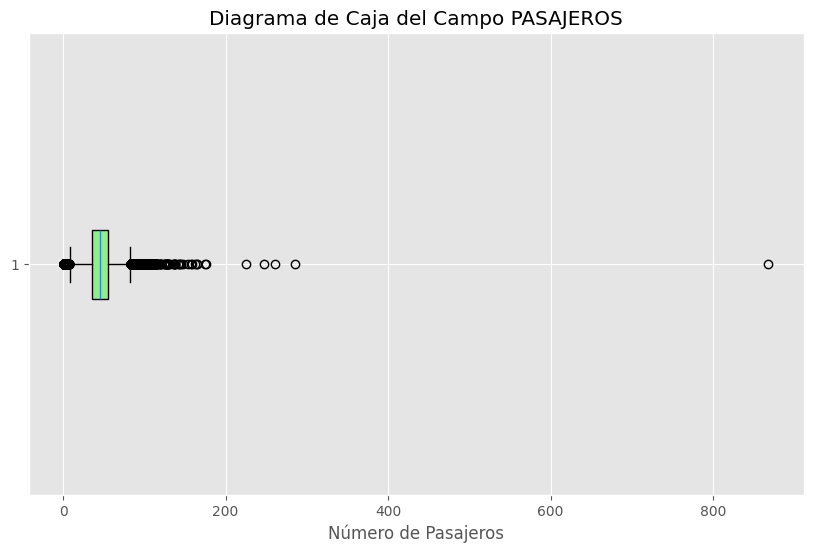

In [87]:
# Visualizar datos atípicos con un diagrama de caja (boxplot)
plt.boxplot(df['PASAJEROS'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Diagrama de Caja del Campo PASAJEROS')
plt.xlabel('Número de Pasajeros')
plt.show()

# Identificar y Filtrar Datos Atípicos
Implementar un método para identificar y filtrar datos atípicos.
Se realiza una agrupación por dia de la semana

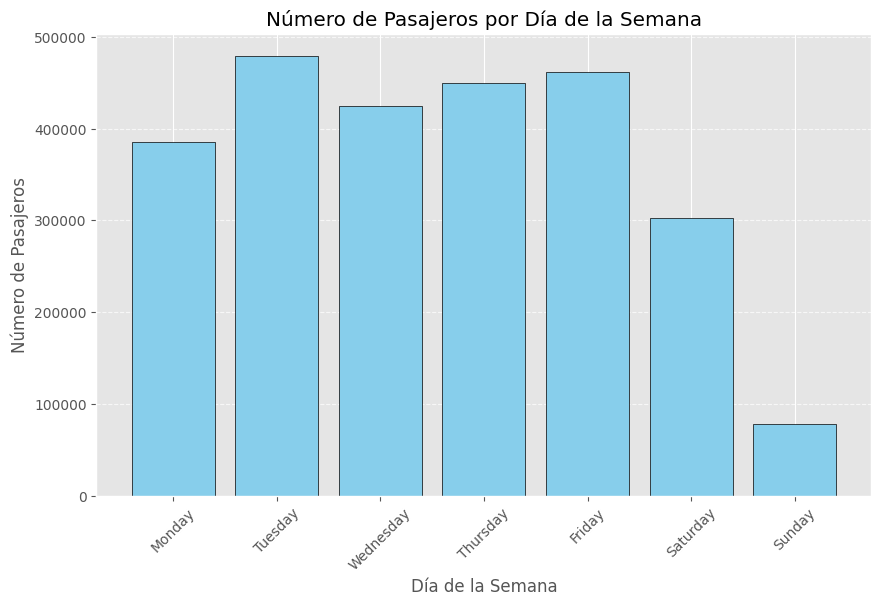

In [88]:
# Asegúrate de que la columna de fechas esté en formato datetime
df['FECHA_INICIAL'] = pd.to_datetime(df['FECHA_INICIAL'])

# Crear una nueva columna con el nombre del día de la semana
df['DIA_SEMANA'] = df['FECHA_INICIAL'].dt.day_name()

# Agrupar los datos por día de la semana y sumar el número de pasajeros
pasajeros_por_dia = df.groupby('DIA_SEMANA')['PASAJEROS'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Graficar el número de pasajeros por día de la semana
plt.bar(pasajeros_por_dia['DIA_SEMANA'], pasajeros_por_dia['PASAJEROS'], color='skyblue', edgecolor='black')
plt.title('Número de Pasajeros por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

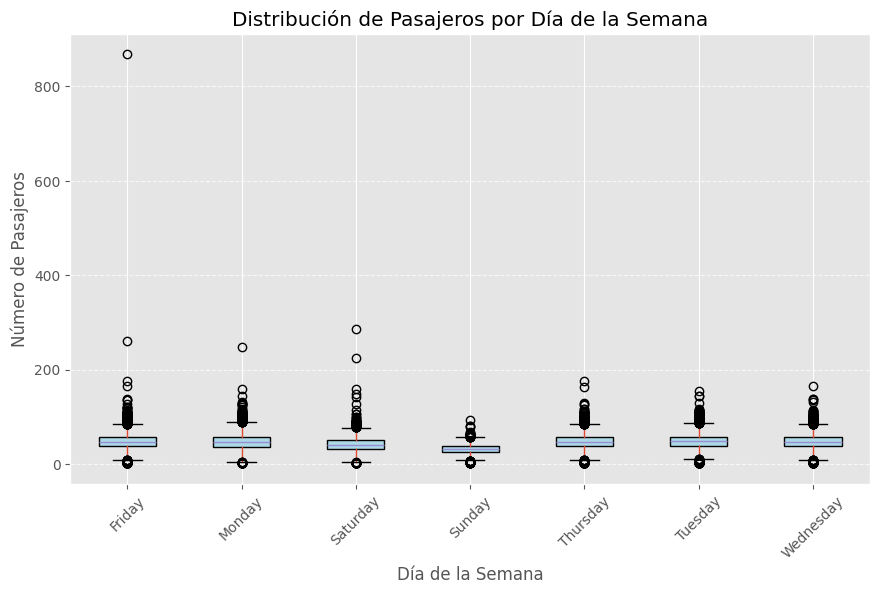

In [89]:
# Crear el boxplot de pasajeros por día de la semana
plt.figure(figsize=(10, 6))
df.boxplot(column='PASAJEROS', by='DIA_SEMANA', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución de Pasajeros por Día de la Semana')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\regis\AppData\Local\Temp\ipykernel_26084\3778845766.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtrado = df.groupby('DIA_SEMANA', group_keys=False).apply(filtrar_outliers_por_dia)
C:\Users\regis\AppData\Local\Temp\ipykernel_26084\3778845766.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby('DIA_SEMANA', group_keys=False).apply(filtrar_outliers_por_dia)


<Figure size 1000x600 with 0 Axes>

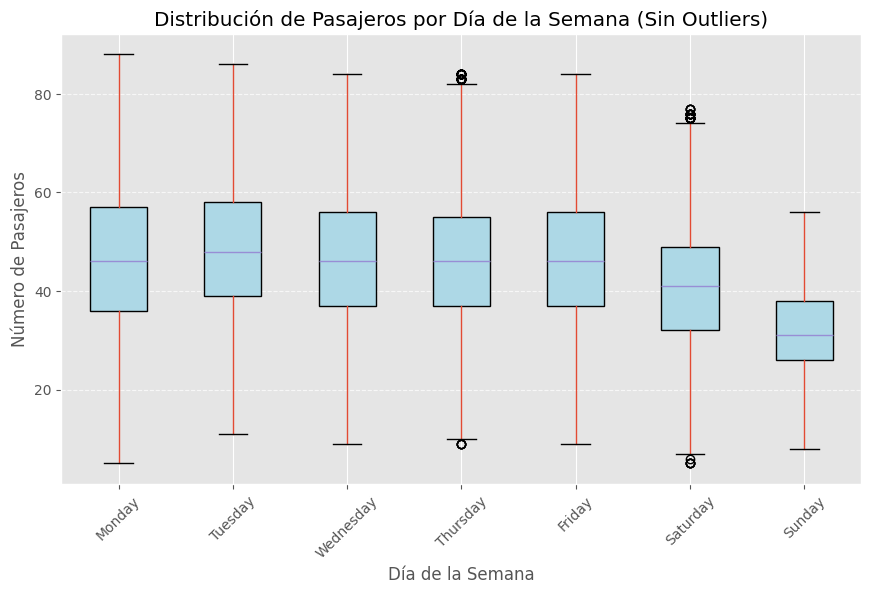

In [90]:
# Asegúrate de que la columna de fechas esté en formato datetime
df['FECHA_INICIAL'] = pd.to_datetime(df['FECHA_INICIAL'])

# Crear una nueva columna con el nombre del día de la semana
df['DIA_SEMANA'] = df['FECHA_INICIAL'].dt.day_name()

# Ordenar los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DIA_SEMANA'] = pd.Categorical(df['DIA_SEMANA'], categories=dias_ordenados, ordered=True)

# Aplicar el rango intercuartílico (IQR) por día de la semana
def filtrar_outliers_por_dia(grupo):
    Q1 = grupo['PASAJEROS'].quantile(0.25)  # Primer cuartil
    Q3 = grupo['PASAJEROS'].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return grupo[(grupo['PASAJEROS'] >= limite_inferior) & (grupo['PASAJEROS'] <= limite_superior)]

# Filtrar los datos eliminando los valores atípicos
df_filtrado = df.groupby('DIA_SEMANA', group_keys=False).apply(filtrar_outliers_por_dia)

# Mostrar el DataFrame filtrado
df_filtrado.head()

# Opcional: Graficar un boxplot con los datos filtrados
plt.figure(figsize=(10, 6))
df_filtrado.boxplot(column='PASAJEROS', by='DIA_SEMANA', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución de Pasajeros por Día de la Semana (Sin Outliers)')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Opcional: Guardar los datos  en un archivo CSV
# df_filtrado.to_csv('datos_pasajeros_filtrado.csv', index=False)


In [91]:
# Filtrar los datos eliminando las filas donde FK_RUTA sea igual a 6 o 5
df = df[~df['FK_RUTA'].isin([5, 6])]

# Mostrar las primeras filas del DataFrame después del filtrado
print(df.head())

  FECHA_INICIAL HORA_INICIAL_PLAN HORA_INICIAL_REAL HORA_INICIAL_AUX  \
1    2024-04-16           4:27:00               NaN          0:00:00   
3    2024-04-16           4:12:00               NaN          0:00:00   
5    2024-04-16           4:33:00               NaN          0:00:00   
7    2024-04-16           4:39:00           4:38:24          4:38:24   
8    2024-04-16           4:40:00               NaN          0:00:00   

  FECHA_FINAL HORA_FINAL_PLAN HORA_FINAL_REAL HORA_FINAL_AUX  FK_RUTA  \
1  2024-04-16         7:26:00         6:17:02        6:00:50        3   
3  2024-04-16         7:11:00         6:16:04        6:16:04        3   
5  2024-04-16         7:32:00         6:44:43        6:44:43        3   
7  2024-04-16         7:20:00         6:53:43        6:53:43        1   
8  2024-04-16         7:39:00         7:01:41        7:01:41        3   

   PASAJEROS  DISTANCIA  FK_VEHICULO  FK_CONDUCTOR  ESTADO_DESPACHO  \
1         49      33200           28            72       

In [92]:
# Asegúrate de que la columna de fechas esté en formato datetime
df['FECHA_INICIAL'] = pd.to_datetime(df['FECHA_INICIAL'])

# Crear una nueva columna con el nombre del día de la semana
df['DIA_SEMANA'] = df['FECHA_INICIAL'].dt.day_name()

# Ordenar los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DIA_SEMANA'] = pd.Categorical(df['DIA_SEMANA'], categories=dias_ordenados, ordered=True)

# Identificar los valores atípicos por día de la semana
def identificar_outliers_por_dia(grupo):
    Q1 = grupo['PASAJEROS'].quantile(0.25)  # Primer cuartil
    Q3 = grupo['PASAJEROS'].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    # Filtrar los valores fuera de los límites
    return grupo[(grupo['PASAJEROS'] < limite_inferior) | (grupo['PASAJEROS'] > limite_superior)]

# Obtener los datos anormales (outliers)
datos_anormales = df.groupby('DIA_SEMANA', group_keys=False).apply(identificar_outliers_por_dia)

# Mostrar los datos anormales
print(datos_anormales)

# Opcional: Guardar los datos anormales en un archivo CSV
# datos_anormales.to_csv('datos_anormales.csv', index=False)

      FECHA_INICIAL HORA_INICIAL_PLAN HORA_INICIAL_REAL HORA_INICIAL_AUX  \
995      2024-04-22           4:27:00               NaN          6:15:36   
1021     2024-04-22           5:50:00           5:49:14          5:49:14   
1056     2024-04-22           8:03:00           8:02:36          8:02:36   
1099     2024-04-22          13:28:00          13:27:59         13:27:59   
1103     2024-04-22          11:46:00          11:46:00         11:46:00   
...             ...               ...               ...              ...   
49448    2025-02-09          10:20:00          10:22:11         10:22:11   
50486    2025-02-16           6:00:00           6:06:40          6:06:40   
51590    2025-02-23          14:10:00          14:06:34         14:06:34   
54713    2025-03-16          13:40:00          13:20:10         13:20:10   
54714    2025-03-16          11:45:00          11:47:08         11:47:08   

      FECHA_FINAL HORA_FINAL_PLAN HORA_FINAL_REAL HORA_FINAL_AUX  FK_RUTA  \
995    202

C:\Users\regis\AppData\Local\Temp\ipykernel_26084\2208434471.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_anormales = df.groupby('DIA_SEMANA', group_keys=False).apply(identificar_outliers_por_dia)
C:\Users\regis\AppData\Local\Temp\ipykernel_26084\2208434471.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datos_anormales = df.groupby('DIA_SEMANA', group_keys=False).apply(identificar_outliers_por_dia)


In [93]:
## Listar los registros duplicados
duplicados = df[df.duplicated()]
duplicados

,FECHA_INICIAL,HORA_INICIAL_PLAN,HORA_INICIAL_REAL,HORA_INICIAL_AUX,FECHA_FINAL,HORA_FINAL_PLAN,HORA_FINAL_REAL,HORA_FINAL_AUX,FK_RUTA,PASAJEROS,DISTANCIA,FK_VEHICULO,FK_CONDUCTOR,ESTADO_DESPACHO,PK_INTERVALO_DESPACHO,PK_INFORMACION_REGISTRADORA,DIA_SEMANA



# Eliminar registros con valores faltantes en las columnas HORA_INICIAL_PLAN o HORA_INICIAL_REA

       HORA_INICIAL_PLAN   HORA_INICIAL_REAL  DIFERENCIA_TIEMPO
994  2024-04-22 04:50:00 2024-04-22 04:45:37          -4.383333
997  2024-04-22 04:39:00 2024-04-22 04:36:44          -2.266667
998  2024-04-22 05:00:00 2024-04-22 05:00:50           0.833333
999  2024-04-22 04:44:00 2024-04-22 04:43:30          -0.500000
1001 2024-04-22 05:15:00 2024-04-22 05:15:16           0.266667


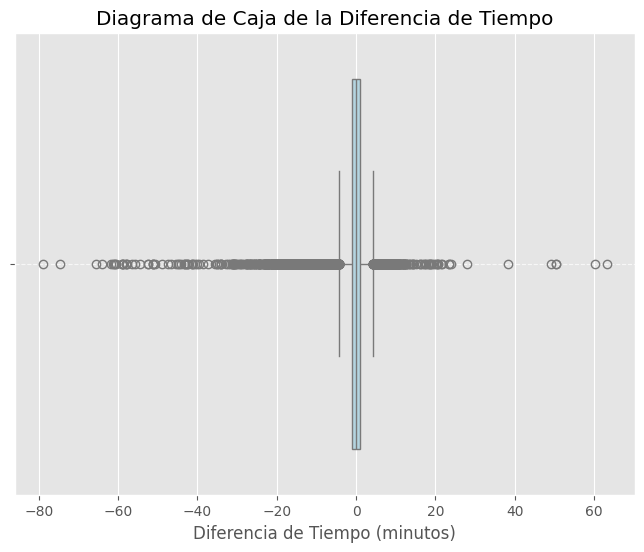

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar registros con valores faltantes en las columnas HORA_INICIAL_PLAN o HORA_INICIAL_REAL
df_filtrado = df_filtrado.dropna(subset=['HORA_INICIAL_PLAN', 'HORA_INICIAL_REAL'])

# Asegurar de que las columnas de tiempo estén en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df_filtrado['HORA_INICIAL_PLAN']):
    df_filtrado['HORA_INICIAL_PLAN'] = pd.to_datetime(df_filtrado['FECHA_INICIAL'].astype(str) + ' ' + df_filtrado['HORA_INICIAL_PLAN'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df_filtrado['HORA_INICIAL_REAL']):
    df_filtrado['HORA_INICIAL_REAL'] = pd.to_datetime(df_filtrado['FECHA_INICIAL'].astype(str) + ' ' + df_filtrado['HORA_INICIAL_REAL'], errors='coerce')


# Asegurar de que las columnas de tiempo estén en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df_filtrado['HORA_FINAL_PLAN']):
    df_filtrado['HORA_FINAL_PLAN'] = pd.to_datetime(df_filtrado['FECHA_FINAL'].astype(str) + ' ' + df_filtrado['HORA_FINAL_PLAN'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df_filtrado['HORA_FINAL_REAL']):
    df_filtrado['HORA_FINAL_REAL'] = pd.to_datetime(df_filtrado['FECHA_FINAL'].astype(str) + ' ' + df_filtrado['HORA_FINAL_REAL'], errors='coerce')




# Calcular la diferencia de tiempo en minutos
df_filtrado['DIFERENCIA_TIEMPO'] = (df_filtrado['HORA_INICIAL_REAL'] - df_filtrado['HORA_INICIAL_PLAN']).dt.total_seconds() / 60

# Mostrar las primeras filas para verificar
print(df_filtrado[['HORA_INICIAL_PLAN', 'HORA_INICIAL_REAL', 'DIFERENCIA_TIEMPO']].head())


# Guardar el DataFrame filtrado en un archivo CSV

df_filtrado.to_csv('Datos/datos_filtrados.csv', index=False)

#Crear un diagrama de caja (boxplot) para la diferencia de tiempo
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtrado['DIFERENCIA_TIEMPO'], color='lightblue')
plt.title('Diagrama de Caja de la Diferencia de Tiempo')
plt.xlabel('Diferencia de Tiempo (minutos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
df_filtrado

,FECHA_INICIAL,HORA_INICIAL_PLAN,HORA_INICIAL_REAL,HORA_INICIAL_AUX,FECHA_FINAL,HORA_FINAL_PLAN,HORA_FINAL_REAL,HORA_FINAL_AUX,FK_RUTA,PASAJEROS,DISTANCIA,FK_VEHICULO,FK_CONDUCTOR,ESTADO_DESPACHO,PK_INTERVALO_DESPACHO,PK_INFORMACION_REGISTRADORA,DIA_SEMANA,DIFERENCIA_TIEMPO
994,2024-04-22,2024-04-22 04:50:00,2024-04-22 04:45:37,4:56:42,2024-04-22,2024-04-22 07:01:00,2024-04-22 06:30:07,6:30:07,6,30,31500,66,304,2,245820,348367,Monday,-4.383333
997,2024-04-22,2024-04-22 04:39:00,2024-04-22 04:36:44,4:36:44,2024-04-22,2024-04-22 07:20:00,2024-04-22 06:51:12,6:51:12,1,51,39200,45,29,2,245811,348370,Monday,-2.266667
998,2024-04-22,2024-04-22 05:00:00,2024-04-22 05:00:50,5:00:50,2024-04-22,2024-04-22 07:00:00,2024-04-22 06:52:32,6:52:32,5,44,31900,47,307,2,245821,348371,Monday,0.833333
999,2024-04-22,2024-04-22 04:44:00,2024-04-22 04:43:30,4:43:30,2024-04-22,2024-04-22 07:25:00,2024-04-22 07:01:56,7:01:56,1,57,39000,71,10,2,245813,348373,Monday,-0.500000
1001,2024-04-22,2024-04-22 05:15:00,2024-04-22 05:15:16,5:15:16,2024-04-22,2024-04-22 07:15:00,2024-04-22 07:14:18,7:14:18,5,55,31400,33,329,3,245826,348375,Monday,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55822,2025-03-23,2025-03-23 16:22:00,2025-03-23 16:22:55,16:22:55,2025-03-23,2025-03-23 18:48:00,NaT,23:59:59,1,39,45100,73,53,0,301662,412353,Sunday,0.916667
55823,2025-03-23,2025-03-23 13:15:00,2025-03-23 13:11:37,13:11:37,2025-03-23,2025-03-23 15:41:00,NaT,23:59:59,1,29,45300,22,318,0,301648,412355,Sunday,-3.383333
55824,2025-03-23,2025-03-23 16:23:00,2025-03-23 16:23:15,16:23:15,2025-03-23,2025-03-23 19:10:00,NaT,23:59:59,3,44,44700,63,3,0,301663,412356,Sunday,0.250000
55825,2025-03-23,2025-03-23 15:23:00,2025-03-23 15:27:52,15:27:52,2025-03-23,2025-03-23 17:49:00,NaT,23:59:59,1,36,44200,8,249,0,301657,412359,Sunday,4.866667
